In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

This notebook is meant to be a venue for looking at the housing datasets for my General Assembly capstone project.

In this project I hope to analyze and target the housing (rental?) prices for San Francisco (and maybe another city). Instead of simply using housing prices, whether asking/sale prices or posted rental rates, I will try to incorporate the wealth of other information from neighborhoods to factor in a more intelligent pricing scheme. In other words, given a price you can afford, where can you get the best deal. This will try to take into account the specific desires of the buyer/renter specific to regions; i.e. is there a higher preference for living near good food, parks, bars, public transit stops, et cetera?

Below we look through some of the datasets publicly availabe to see what features we use in this project. In most cases it is advantageous to have data points connected to geography - latitude/longitude coordinates included in datasets.

## Airbnb data

These data were downloaded from a third party website that supplies Airbnb sata from cities around the world. An elaborate list of disclaimers is available here (http://insideairbnb.com/about.html#disclaimers). It seems like they took a reasonable approach at cleaning the data, but this should be referenced to be aware of biases.

In [44]:
bnb_cal = pd.read_csv('../project_data/airbnb_data/calendar.csv')
bnb_listings_sum = pd.read_csv('../project_data/airbnb_data/listings_sum.csv')
bnb_listings = pd.read_csv('../project_data/airbnb_data/listings.csv')
bnb_reviews_sum = pd.read_csv('../project_data/airbnb_data/reviews_sum.csv')
bnb_reviews = pd.read_csv('../project_data/airbnb_data/reviews.csv')

In [37]:
print bnb_cal.shape
bnb_cal.head()

(3145935, 4)


,listing_id,date,available,price
0,11187767,2017-03-12,f,NaN
1,11187767,2017-03-11,f,NaN
2,11187767,2017-03-10,f,NaN
3,11187767,2017-03-09,f,NaN
4,11187767,2017-03-08,f,NaN


There are two types of availability, 't' and 'f', not sure what they stand for, but only 't's have prices, making beleive that 't' means true and 'f' means false - probably a safe bet that that is the case. 't' or true must mean that the apartment is unavailable, perhaps it doesn't matter given that the price probably doesn't change much over the course of a month. If there are pricing changes for listings then we can track them month by month or year by year.

In [4]:
bnb_listings.thumbnail_url.values[0]

'https://a2.muscache.com/im/pictures/e8652800-ae74-4322-824e-a9c7e5deda63.jpg?aki_policy=small'

In [5]:
print bnb_listings.shape
bnb_listings.head().T

(8619, 95)


,0,1,2,3,4
id,11187767,6938818,9395222,8388658,7856443
listing_url,https://www.airbnb.com/rooms/11187767,https://www.airbnb.com/rooms/6938818,https://www.airbnb.com/rooms/9395222,https://www.airbnb.com/rooms/8388658,https://www.airbnb.com/rooms/7856443
scrape_id,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156
last_scraped,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02
name,Huge Seacliff Penthouse With Views,Best Secret in Town,"Ocean Beach, Lands End Escape",Mid-century Seacliff near GG Bridge,The Real San Francisco #2
summary,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacliff neighborho...,"Minutes to GG Bridge, GG Park, Museums, The Pr..."
space,"Spacious patio deck, library with over 300 mov...",The room is spacious and it is on the top leve...,Huge backyard with a FirePit and lounge chairs...,NaN,Following the wild popularity of our downstair...
description,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacliff neighborho...,"Minutes to GG Bridge, GG Park, Museums, The Pr..."
experiences_offered,none,none,none,none,none
neighborhood_overview,"The neighborhood includes Legion of Honor, Sut...",It is in the city and close to everything. Par...,NaN,NaN,"For those who love the outdoors and good food,..."


In [33]:
bnb_cal.price.value_counts(dropna=False).head(10)

NaN        1909112
$150.00      45065
$200.00      35702
$250.00      33873
$100.00      28943
$300.00      28324
$125.00      27444
$175.00      24212
$120.00      21745
$350.00      20088
Name: price, dtype: int64

In [48]:
def conv_to_float(s):
    if s:
        return float(s)
    else:
        return s

In [49]:
bnb_cal['price'] = bnb_cal.price.replace(to_replace=r'[^0-9.]+', value='', regex=True, )
bnb_cal['price'] = bnb_cal.price.apply(conv_to_float, convert_dtype=True)
bnb_cal.price.value_counts(dropna=False).head(10)

NaN       1909112
 150.0      45065
 200.0      35702
 250.0      33873
 100.0      28943
 300.0      28324
 125.0      27444
 175.0      24212
 120.0      21745
 350.0      20088
Name: price, dtype: int64

(0, 2000)

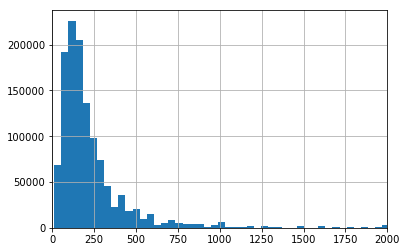

In [59]:
bnb_cal.price.hist(bins=300,)
plt.xlim((0, 2000))

In [76]:
bnb_cal.iloc[17500]

listing_id      13590516
date          2016-07-21
available              t
price                735
Name: 17500, dtype: object

The Airbnb calendar dataset gives a list of prices for the listings over the past year. If the unit is available for rent, a price is listed. Some listings have the same price over the entire year and other listings have different pricing schemes for certain periods of time. Below, I show a listing that is $90 more expensive on weekends. This may also be the case for some listings over holiday periods or popular vacation times (e.g. spring break or Memorial Day).

In [103]:
print bnb_cal[bnb_cal.listing_id == 13590516].shape
bnb_cal[bnb_cal.listing_id == 13590516].head()

(365, 4)


,listing_id,date,available,price
17155,13590516,2017-07-01,t,525.0
17156,13590516,2017-06-30,t,525.0
17157,13590516,2017-06-29,t,434.0
17158,13590516,2017-06-28,t,434.0
17159,13590516,2017-06-27,t,434.0


In [6]:
print bnb_listings_sum.shape
bnb_listings_sum.head().T

(8619, 16)


,0,1,2,3,4
id,11187767,6938818,9395222,8388658,7856443
name,Huge Seacliff Penthouse With Views,Best Secret in Town,"Ocean Beach, Lands End Escape",Mid-century Seacliff near GG Bridge,The Real San Francisco #2
host_id,58242037,36381578,25963295,9996441,6076870
host_name,Jonathan,Harris,Tyler,Howard,Todd And Tatyana
neighbourhood_group,NaN,NaN,NaN,NaN,NaN
neighbourhood,Seacliff,Seacliff,Seacliff,Seacliff,Seacliff
latitude,37.7797,37.7807,37.7814,37.7877,37.7821
longitude,-122.51,-122.506,-122.505,-122.489,-122.493
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt
price,400,99,155,895,195


In [7]:
bnb_reviews.listing_id.unique().shape

(6396,)

In [8]:
print bnb_reviews.shape
bnb_reviews.head()

(169739, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,8308113,47419975,2015-09-18,6288054,Colin,Host was excellent and was contactable / respo...
1,3320213,14805088,2014-06-26,17101713,Faye,The place was clean and spacious and the guy t...
2,3320213,17192435,2014-08-08,182792,Jocelyne & Pontus,This place wasn't as pleasant as we hoped. Had...
3,3320213,17597907,2014-08-14,19649465,Francesco,Si tratta di una piccola pensione/albergo.\nSt...
4,3320213,18293826,2014-08-24,1104165,Daniel,"Nice room, cool neighbourhood. Note that this ..."


In [9]:
print bnb_reviews_sum.shape
bnb_reviews_sum.head()

(169739, 2)


,listing_id,date
0,8308113,2015-09-18
1,3320213,2014-06-26
2,3320213,2014-08-08
3,3320213,2014-08-14
4,3320213,2014-08-24


In [10]:
bnb_reviews_sum.date.value_counts()

2015-09-21    569
2016-05-30    491
2016-05-15    489
2015-08-07    487
2016-06-10    486
2016-05-23    465
2016-05-22    464
2015-09-18    461
2016-06-09    459
2016-06-17    453
2016-05-16    452
2016-05-08    445
2016-04-11    445
2016-02-08    442
2016-02-15    438
2015-10-24    438
2016-03-17    432
2016-06-18    429
2016-06-13    420
2016-05-28    414
2015-09-19    412
2016-04-04    406
2015-08-10    405
2016-05-18    404
2016-04-01    402
2016-03-19    401
2016-06-19    397
2016-03-20    396
2016-05-31    392
2016-05-21    391
             ... 
2011-03-23      1
2011-03-24      1
2011-10-15      1
2010-10-30      1
2009-09-14      1
2011-02-27      1
2010-07-31      1
2010-07-30      1
2009-09-11      1
2009-09-12      1
2010-09-03      1
2009-10-03      1
2009-10-05      1
2010-10-16      1
2009-10-08      1
2009-07-15      1
2010-02-13      1
2010-02-17      1
2010-03-30      1
2010-02-15      1
2010-02-14      1
2010-02-18      1
2011-01-12      1
2011-03-02      1
2010-07-07

## SF city data

### 311 records

In [11]:
rec_311 = pd.read_csv('../project_data/sf_city_data/311_case_records/311_records.csv')

/Users/taylorkilian/anaconda3/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
print rec_311.shape
rec_311.head()

(1821839, 16)


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,12/01/2008 03:19:00 PM,Closed,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9,Mission,"(37.7571008516766, -122.417811874214)",Voice In,NaN
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3,Nob Hill,"(37.7884895281133, -122.421948485141)",Voice In,NaN
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,12/27/2008 06:07:00 AM,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2,Western Addition,"(37.7850837365507, -122.447620029034)",Voice In,NaN
3,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",3,Nob Hill,"(37.795328529, -122.418067787)",Voice In,NaN
4,322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM,12/13/2008 10:50:00 AM,Closed,NaN,RPD Park Service Area GGP Queue,Rec and Park Requests,Park - Structural_Maintenance,Other,"GGP Panhandle, SAN FRANCISCO, CA, 94117",5,Haight Ashbury,"(37.772204762, -122.4487004)",Voice In,NaN


Data back to 2008 - need to double check this after converting date ranges to datetime objects.

In [13]:
rec_311.Category.value_counts()

Street and Sidewalk Cleaning    636346
Graffiti Public Property        173169
General Requests                133050
Graffiti Private Property       132591
Abandoned Vehicle               129793
Damaged Property                 71597
SFHA Requests                    64117
Sewer Issues                     58085
Streetlights                     48497
Tree Maintenance                 45370
MUNI Feedback                    43864
Street Defects                   39155
Litter Receptacles               37458
Illegal Postings                 35902
Sign Repair                      32613
Rec and Park Requests            30541
Sidewalk or Curb                 27904
Temporary Sign Request           24892
311 External Request             17156
Blocked Street or SideWalk       14565
Residential Building Request      7950
Color Curb                        5372
Catch Basin Maintenance           4852
Noise Report                      2955
Construction Zone Permits         2044
Interdepartmental Request

In [14]:
rec_311['Request Type'].value_counts()

Sidewalk_Cleaning                                                                                171694
Bulky Items                                                                                      144358
General Cleaning                                                                                 143973
Not_Offensive Graffiti on Private Property                                                       100851
Offensive Graffiti on Public Property                                                             95348
Not_Offensive Graffiti on Public Property                                                         77386
Hazardous Materials                                                                               63864
Damaged Parking_Meter                                                                             52767
Illegal_Dumping                                                                                   44598
Abandoned Vehicle - Car4door                                    

Lots of geolocated data to play around with...

### Parks

'Park_info.csv' contains geolocated information about the many parks in San Francisco. 

'park_scores.csv' contains scores for the various parks. Need to figure out exactly how these scores are given, but can like with the geolocations of the actual parks to see which parks people may like more - these would be better to live next to, if it's important to you.

In [15]:
park_info = pd.read_csv('../project_data/sf_city_data/parks/park_info.csv')
park_scores = pd.read_csv('../project_data/sf_city_data/parks/park_scores.csv')

In [16]:
print park_info.shape
park_info.head()

(230, 12)


,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN


In [17]:
park_info.loc[1,'Location 1']

'351 9th Ave\nSan Francisco, CA\n(37.78184397, -122.46809908)'

In [18]:
print park_scores.shape
park_scores.head()

(5495, 5)


,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


### SF crime data

San Francisco provides data on crimes (or SFPD incidents) back to 2003. This time frame may need to be adjusted so that possible estimators are current.

In [19]:
crimes_sf = pd.read_csv('../project_data/sf_city_data/sf_crime/sfpd_incidents_from2003.csv')

In [20]:
print crimes_sf.shape
crimes_sf.head()

(1945294, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200


In [21]:
crimes_sf.Category.value_counts()

LARCENY/THEFT                  400224
OTHER OFFENSES                 276609
NON-CRIMINAL                   207987
ASSAULT                        170313
VEHICLE THEFT                  116480
DRUG/NARCOTIC                  113099
VANDALISM                       99417
WARRANTS                        92224
BURGLARY                        81024
SUSPICIOUS OCC                  69855
MISSING PERSON                  57243
ROBBERY                         49960
FRAUD                           36970
SECONDARY CODES                 22271
FORGERY/COUNTERFEITING          22055
WEAPON LAWS                     19155
TRESPASS                        16483
PROSTITUTION                    15839
STOLEN PROPERTY                 10437
SEX OFFENSES, FORCIBLE           9912
DISORDERLY CONDUCT               9211
DRUNKENNESS                      9207
RECOVERED VEHICLE                7690
DRIVING UNDER THE INFLUENCE      5093
KIDNAPPING                       4946
RUNAWAY                          4047
LIQUOR LAWS 

### Other possible SF city datasets

Some other datasets may be useful for some of this project, but I'm not entirely sure if they are useful at this point in time. I will load them into the notebook to evaluate.

#### Zillow property sales

Zillow has its own API that could provide a wealth of information - I need to dig deeper into that later. For now, here is the Zillow dataset provided that describes median sale prices ***per square foot*** for homes across the country.

In [22]:
zillow_median_sale = pd.read_csv('../project_data/sf_city_data/zillow_property_sales/zillow_mediansale_persqft_neighborhood.csv')

In [23]:
print zillow_median_sale.shape
zillow_median_sale.head()

(4238, 250)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,...,157.5133,151.1346,148.4390,154.5512,151.9219,158.5226,165.6903,170.1752,176.2920,180.1894
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,71.7410,71.7994,70.7296,...,119.4710,119.0146,116.6964,114.6923,113.0189,113.8884,114.8041,116.3150,118.9096,NaN
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,46.6023,47.1911,47.1452,...,90.0998,91.9159,93.4707,95.0144,94.9214,95.2213,96.8052,97.2812,98.3929,100.1619
3,270958,Upper West Side,New York,NY,New York,New York,4,267.2269,284.3680,282.8276,...,1412.9753,1399.5488,1392.7152,1492.7994,1536.2801,1462.3706,1458.9674,1426.4533,1485.8095,1480.3050
4,27080,Sherman Oaks,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,5,105.4025,102.1831,99.7840,...,421.2244,425.3723,423.0285,415.3199,411.3433,451.6802,472.8199,492.2803,494.7221,509.6003


In [24]:
zillow_median_sale[zillow_median_sale.CountyName == 'San Francisco'].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
113,274552,Mission,San Francisco,CA,San Francisco,San Francisco,114,NaN,165.0000,174.2246,...,992.9989,1007.8958,979.4455,1005.1700,1009.133,NaN,949.5807,972.4858,1037.102300,NaN
340,268020,Bernal Heights,San Francisco,CA,San Francisco,San Francisco,341,199.9639,197.9637,190.1546,...,950.6946,1046.6708,NaN,953.7609,NaN,NaN,NaN,1000.0000,1097.479000,1069.1111
403,117654,Central Richmond,San Francisco,CA,San Francisco,San Francisco,404,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,268150,Excelsior,San Francisco,CA,San Francisco,San Francisco,415,166.5026,168.5534,165.7665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.333333,NaN
472,272885,Bayview,San Francisco,CA,San Francisco,San Francisco,473,NaN,97.7762,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.533173,NaN


#### Assesor office data

Assessor data from SF City that provides information on property and sales over a ? time. Might not be super useful given the other information available, but but might provide some additional features.

In [25]:
# I'm going to load just the most recent data for now
sf_assessor = pd.read_csv('../project_data/sf_city_data/assessor_office/assessor_data_2014_2015.csv')

/Users/taylorkilian/anaconda3/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
print sf_assessor.shape
sf_assessor.head().T

(206816, 41)


,0,1,2,3,4
PROPLOC,0000 0000 0000,0000 0000 0000,0000 0000 0000,0000 0000 0000,0000 0000 0000
RP1NBRCDE,08H,08H,08H,08H,08H
RP1PRCLID,0001 001,0002 001,0004 002,0005 001,0006 001
BASELOT,0,0,0,0,0
BASELOTSFX,NaN,NaN,NaN,NaN,NaN
RP1VOLUME,1,1,1,1,1
RP1CLACDE,G,G,VCI,G,G
YRBLT,1900,1900,0,1900,1900
BATHS,0,0,0,0,0
BEDS,0,0,0,0,0


## Yelp info

An overview of the data that can be obtained through the Yelp API.

Yelp Business API feature info:

| Name | Type | Description |
|-----|------|------------|
|id | string | Yelp ID of this business.|
|name | string | Name of this business.|
|image_url | string | URL of photo for this business.|
|is_claimed | bool | Whether business has been claimed by a business owner|
|is_closed | bool | Whether business has been (permanently) closed|
|url | string | URL for business page on Yelp.|
|price | string | Price level of the business. Value is one of $, $$, $$$ and $$$$.|
|phone | string | Phone number of the business.|
|rating | decimal | Rating for this business (value ranges from 1, 1.5, ... 4.5, 5).|
|review_count | int | Number of reviews for this business.|
|photos | object[] | URLs of up to three photos of the business.|
|hours | object[] | Opening hours of the business.|
|hours[x].is_open_now | boolean | Whether the business is currently open or not.|
|hours[x].hours_type | string | The type of the opening hours information. Right now, always return REGULAR.|
|hours[x].open | object[] | The detailed opening hours of each day in a week.|
|hours[x].open[x].day | int | From 0 to 6, representing day of the week from Monday to Sunday. Notice that you may get the same day of the week more than once if the business has more than one opening time slots.|
|hours[x].open[x].start | string | Start of the opening hours in a day, in 24-hour clock notation, like 1000 means 10 AM.|
|hours[x].open[x].start | string | Start of the opening hours in a day, in 24-hour clock notation, like 1000 means 10 AM.|
|hours[x].open[x].end | string | End of the opening hours in a day, in 24-hour clock notation, like 2130 means 9:30 PM.|
|hours[x].open[x].is_overnight | boolean | Whether the business opens overnight or not. When this is true, the end time will be lower than the start time.|
|categories | object[] | A list of category title and alias pairs associated with this business.|
|categories[x].alias | string | Alias of a category, when searching for business in certain categories, use alias rather than the title.|
|categories[x].title | string | Title of a category for display purpose.|
|coordinates | object | The coordinates of this business.|
|coordinates.latitude | decimal | The latitude of this business.|
|coordinates.longitude | decimal | The longitude of this business.|
|location | object | The location of this business, including address, city, state, zip code and country.|
|location.address1 | string | Street address of this business.|
|location.address2 | string | Street address of this business, continued.|
|location.address3 | string | Street address of this business, continued.|
|location.city | string | City of this business.|
|location.state | string | ISO 3166-2 State code of this business.|
|location.zip_code | string | Zip code of this business.|
|location.country | string | ISO 3166-1 alpha-2 country code of this business.|
|location.cross_streets | string | Cross streets for this business.|
|transactions | string[] | A list of Yelp transactions that the business is registered for. Current supported values are "pickup", "delivery", and "restaurant_reservation".|

Yelp reviews API only returns three reviews per business and requires that the individual business id be placed into the GET request url.

|Name | Type | Description|
|-----|------|------------|
|total | int | The total number of reviews that the business has.|
|reviews | object[] | A list of up to three reviews of this business.|
|reviews[x].text | string | Text excerpt of this review.|
|reviews[x].url | string | URL of this review.|
|reviews[x].rating | int | Rating of this review.|
|reviews[x].time_created | string | The time that the review was created in PST.|
|reviews[x].user | object | The user who wrote the review.|
|reviews[x].user.name | string | Name of the user.|
|reviews[x].user.image_url | string | URL of the user's profile photo.|

## Airbnb preliminary data treatment

The goal is to clean the Airbnb datasets then combine the calendar df (which includes prices) with the listings df and the reviews df. This combined Airbnb dataset will then be used to build, train, and test a preliminary pricing model for rentals.

Much of the data still need to be converted to numeric types. Need to also check if all listing ids match across the various tables. Would be great to do some NLP on the reviews and maybe listing info. I am assuming that the listing info provided by owners is going to be from a rose-colored glasses perspective, but might still be useful.

There is a lot of other information that could be combined with this to make a more robust model, but it will be good to establish a baseline first. Also, there are still somethings that need to be hammered out, like how the prices could changes depending on the date of the rental - for now I may just assign a rental rate that is the mean of all of the prices through the year (i.e. not just a mean of the high and low price but a mean over all of the days the listing is available for rent).

In [84]:
print 'Number or listings ids in "calendar": {}'.format(len(bnb_cal.listing_id.unique()))
print 'Number or listings ids in "listings": {}'.format(len(bnb_listings.id.unique()))
print 'Number or listings ids in "reviews": {}'.format(len(bnb_reviews.listing_id.unique()))


Number or listings ids in "calendar": 8619
Number or listings ids in "listings": 8619
Number or listings ids in "reviews": 6396


It appears that there are not reviews for every listing, this could be because some of them are new listings or people signed up but never actually listed their units. For most of the listings there are many reviews that need to be coalesced for word analysis. Listings that are missing reviews may have never had guests, for one reason or another.

In [86]:
bnb_reviews[bnb_reviews.listing_id == 3320213]

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,3320213,14805088,2014-06-26,17101713,Faye,The place was clean and spacious and the guy t...
2,3320213,17192435,2014-08-08,182792,Jocelyne & Pontus,This place wasn't as pleasant as we hoped. Had...
3,3320213,17597907,2014-08-14,19649465,Francesco,Si tratta di una piccola pensione/albergo.\nSt...
4,3320213,18293826,2014-08-24,1104165,Daniel,"Nice room, cool neighbourhood. Note that this ..."
5,3320213,18602107,2014-08-28,20421291,Dervla,The listing was accurate and the location was ...
6,3320213,18962894,2014-09-03,5356869,Lily,Great location!
7,3320213,19856731,2014-09-19,4522712,Eli,There is very little host interaction since yo...
8,3320213,20627838,2014-10-02,21535655,Sergiu,Very good place. It is very clean and quiet. I...
9,3320213,20802533,2014-10-05,21988006,Kenneth,"Great location, comfy room. Accommodating host..."
10,3320213,21475691,2014-10-18,21643735,Joanna,Note that this room is in an actual hotel. It ...


First, I need to deal with the prices from the calendar table, which need to be grouped by id, aggregating the prices by taking the mean for each listing. The listings summary table actually has pricing information for each listing but I want to see if those prices are consistent and take into account the vairable rate that some people charge for their rentals.

In [90]:
bnb_listings_sum.id.unique().shape

(8619,)

In [104]:
cal_mean_prices = bnb_cal.groupby("listing_id")[["price"]].mean()
cal_mean_prices.reset_index(inplace=True)
cal_mean_prices.tail()

,listing_id,price
8614,13801466,55.000000
8615,13802849,61.071429
8616,13802856,75.000000
8617,13803228,NaN
8618,13803588,60.000000


In [105]:
bnb_listings_sum[bnb_listings_sum.id == 13803228]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1037,13803228,Fab Mid-Century Master Suite,79745762,Troy,NaN,Diamond Heights,37.746253,-122.444623,Private room,195,2,0,NaN,NaN,1,0


Some of the units that don't have any prices listed in the calendar have prices given in the listings summary table. Need to decide what to do about this - it's pretty clear that people may have stopped making their units available for rent (missing from calendar availibility) even though they still have a rental profile/summary available in the listings summary table.

In [102]:
bnb_listings.T

,0,1,2,3,4,5,6,7,8,9,...,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618
id,11187767,6938818,9395222,8388658,7856443,4781448,1427660,8087607,9904485,3168359,...,13786383,13478781,13661869,13397630,13674541,13493466,13684317,13203823,13671441,13714376
listing_url,https://www.airbnb.com/rooms/11187767,https://www.airbnb.com/rooms/6938818,https://www.airbnb.com/rooms/9395222,https://www.airbnb.com/rooms/8388658,https://www.airbnb.com/rooms/7856443,https://www.airbnb.com/rooms/4781448,https://www.airbnb.com/rooms/1427660,https://www.airbnb.com/rooms/8087607,https://www.airbnb.com/rooms/9904485,https://www.airbnb.com/rooms/3168359,...,https://www.airbnb.com/rooms/13786383,https://www.airbnb.com/rooms/13478781,https://www.airbnb.com/rooms/13661869,https://www.airbnb.com/rooms/13397630,https://www.airbnb.com/rooms/13674541,https://www.airbnb.com/rooms/13493466,https://www.airbnb.com/rooms/13684317,https://www.airbnb.com/rooms/13203823,https://www.airbnb.com/rooms/13671441,https://www.airbnb.com/rooms/13714376
scrape_id,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,...,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156
last_scraped,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,...,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02
name,Huge Seacliff Penthouse With Views,Best Secret in Town,"Ocean Beach, Lands End Escape",Mid-century Seacliff near GG Bridge,The Real San Francisco #2,3 Bd 2.5 Ba Full Flat Condo w Views,Charming Studio Apt at Ocean Beach,Single Room Beautiful Beach Condo,Great Room!,Charming & Private Ideal location,...,Vacation Retreat,Private cabin in 36 ft sailboat at Pier 39,[4B] Private Bedroom with Shared Bathroom,Spacious 4bd House With Office close SF and BART!,15 min to SF DT / Hacker House M2,43' motor yacht in SOMA,15 min to SF DT / Hacker House M3,Beautiful Big Boat - Fort Mason/Marina,15 min to SF DT / Hacker House M1,15 min to SF DT / Hacker House M5
summary,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacliff neighborho...,"Minutes to GG Bridge, GG Park, Museums, The Pr...",Our family-friendly condo is located in San Fr...,"Charming, private, peaceful hideaway 2 blocks ...","When I travel, my quiet beach side condo makes...","Quite house, clean room, nice roommates.",NaN,...,"My place is close to BART, Public Transportati...","The boat, Bay Bounty, is close to Sea Lion Col...",This spacious room fits up to 2 adults comfort...,"Quiet, spacious, detached house with exec offi...",Our guests are young and smart startup founder...,Great location on the water in sunny SOMA. Nex...,Our guests are young and smart startup founder...,Want to go for a run to the Golden Gate Bridge...,Our guests are young and smart startup founder...,My place is close to Bart station . You’ll lov...
space,"Spacious patio deck, library with over 300 mov...",The room is spacious and it is on the top leve...,Huge backyard with a FirePit and lounge chairs...,NaN,Following the wild popularity of our downstair...,"Open concept living, dining area has great cit...","Dear Guests, This quiet and private, 1 bedroom...",NaN,NaN,"Spacious, quiet and beautifully decorated, thi...",...,NaN,Your private cabin consists only of one perfec...,-This room is on the 4th floor with no elevato...,NaN,NaN,Staying on a yacht is as close as you can get ...,NaN,This is a very nice place to stay. Even thoug...,NaN,NaN
description,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacli

In [114]:
listing_cols = bnb_listings.columns.values

In [113]:
bnb_listings.room_type[1000]

'Private room'

Merge summary table with the prices calculated from the calendar table.

In [129]:
cal_sum.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group               8619
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price_x                              0
minimum_nights                       0
number_of_reviews                    0
last_review                       2223
reviews_per_month                 2223
calculated_host_listings_count       0
availability_365                     0
listing_id                           0
price_y                           2227
price_mod                            0
dtype: int64

In [203]:
cal_sum = bnb_listings_sum.merge(cal_mean_prices, left_on="id", right_on="listing_id", how='left')
cal_sum['price_mod'] = cal_sum.price_y.values
cal_sum.price_mod.fillna(cal_sum['price_x'], inplace=True)
price_cut = cal_sum[['id', 'price_y', 'price_mod']]
cal_sum.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,price_y,price_mod
0,11187767,Huge Seacliff Penthouse With Views,58242037,Jonathan,NaN,Seacliff,37.779685,-122.510472,Entire home/apt,400,2,3,2016-06-25,0.88,1,152,11187767,497.368421,497.368421


Almost all of the columns from the summary table are present in the listings table already. Therefore, I can extract the two price columns (including the one I created) and merge them with the full listings table.

In [230]:
room_type = bnb_listings[['id', 'room_type']]
room_type = pd.get_dummies(room_type, columns=['room_type'])
room_type.rename(columns={"room_type_Entire home/apt": 'entire_home_apt', 'room_type_Private room': 'private_room',
                          'room_type_Shared room': 'shared_room'}, inplace=True)

prop_type = bnb_listings[['id', 'property_type']]
prop_type = pd.get_dummies(prop_type, columns=['property_type'])
prop_type.rename(columns={'property_type_Apartment': 'apartment', 'property_type_Bed & Breakfast': 'bed_breakfast',
                          'property_type_Boat': 'boat', 'property_type_Bungalow': 'bungalow', 
                          'property_type_Cabin': 'cabin', 'property_type_Camper/RV': 'camper_rv', 
                          'property_type_Castle': 'castle', 'property_type_Cave': 'cave', 
                          'property_type_Condominium': 'codominium', 'property_type_Dorm': 'dorm', 
                          'property_type_House': 'house', 'property_type_Lighthouse': 'lighthouse', 
                          'property_type_Loft': 'loft', 'property_type_Other': 'other', 
                          'property_type_Tent': 'tent', 'property_type_Townhouse': 'townhouse', 
                          'property_type_Treehouse': 'treehouse', 'property_type_Villa': 'villa', 
                          'property_type_Yurt': 'yurt'}, inplace=True)

In [231]:
bnb_list_full = bnb_listings.merge(price_cut, on='id', how='left')
bnb_list_full = bnb_list_full.merge(room_type, on='id', how='left')
bnb_list_full = bnb_list_full.merge(prop_type, on='id', how='left')
bnb_list_full.review_scores_rating.fillna(bnb_list_full.review_scores_rating.mean(), inplace=True)
bnb_list_full.review_scores_accuracy.fillna(bnb_list_full.review_scores_accuracy.mean(), inplace=True)
bnb_list_full.review_scores_cleanliness.fillna(bnb_list_full.review_scores_cleanliness.mean(), inplace=True)
bnb_list_full.review_scores_checkin.fillna(bnb_list_full.review_scores_checkin.mean(), inplace=True)
bnb_list_full.review_scores_communication.fillna(bnb_list_full.review_scores_communication.mean(), inplace=True)
bnb_list_full.review_scores_location.fillna(bnb_list_full.review_scores_location.mean(), inplace=True)
bnb_list_full.review_scores_value.fillna(bnb_list_full.review_scores_value.mean(), inplace=True)

bnb_list_full.T

,0,1,2,3,4,5,6,7,8,9,...,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618
id,11187767,6938818,9395222,8388658,7856443,4781448,1427660,8087607,9904485,3168359,...,13786383,13478781,13661869,13397630,13674541,13493466,13684317,13203823,13671441,13714376
listing_url,https://www.airbnb.com/rooms/11187767,https://www.airbnb.com/rooms/6938818,https://www.airbnb.com/rooms/9395222,https://www.airbnb.com/rooms/8388658,https://www.airbnb.com/rooms/7856443,https://www.airbnb.com/rooms/4781448,https://www.airbnb.com/rooms/1427660,https://www.airbnb.com/rooms/8087607,https://www.airbnb.com/rooms/9904485,https://www.airbnb.com/rooms/3168359,...,https://www.airbnb.com/rooms/13786383,https://www.airbnb.com/rooms/13478781,https://www.airbnb.com/rooms/13661869,https://www.airbnb.com/rooms/13397630,https://www.airbnb.com/rooms/13674541,https://www.airbnb.com/rooms/13493466,https://www.airbnb.com/rooms/13684317,https://www.airbnb.com/rooms/13203823,https://www.airbnb.com/rooms/13671441,https://www.airbnb.com/rooms/13714376
scrape_id,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,...,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156,20160702162156
last_scraped,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,...,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02,2016-07-02
name,Huge Seacliff Penthouse With Views,Best Secret in Town,"Ocean Beach, Lands End Escape",Mid-century Seacliff near GG Bridge,The Real San Francisco #2,3 Bd 2.5 Ba Full Flat Condo w Views,Charming Studio Apt at Ocean Beach,Single Room Beautiful Beach Condo,Great Room!,Charming & Private Ideal location,...,Vacation Retreat,Private cabin in 36 ft sailboat at Pier 39,[4B] Private Bedroom with Shared Bathroom,Spacious 4bd House With Office close SF and BART!,15 min to SF DT / Hacker House M2,43' motor yacht in SOMA,15 min to SF DT / Hacker House M3,Beautiful Big Boat - Fort Mason/Marina,15 min to SF DT / Hacker House M1,15 min to SF DT / Hacker House M5
summary,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacliff neighborho...,"Minutes to GG Bridge, GG Park, Museums, The Pr...",Our family-friendly condo is located in San Fr...,"Charming, private, peaceful hideaway 2 blocks ...","When I travel, my quiet beach side condo makes...","Quite house, clean room, nice roommates.",NaN,...,"My place is close to BART, Public Transportati...","The boat, Bay Bounty, is close to Sea Lion Col...",This spacious room fits up to 2 adults comfort...,"Quiet, spacious, detached house with exec offi...",Our guests are young and smart startup founder...,Great location on the water in sunny SOMA. Nex...,Our guests are young and smart startup founder...,Want to go for a run to the Golden Gate Bridge...,Our guests are young and smart startup founder...,My place is close to Bart station . You’ll lov...
space,"Spacious patio deck, library with over 300 mov...",The room is spacious and it is on the top leve...,Huge backyard with a FirePit and lounge chairs...,NaN,Following the wild popularity of our downstair...,"Open concept living, dining area has great cit...","Dear Guests, This quiet and private, 1 bedroom...",NaN,NaN,"Spacious, quiet and beautifully decorated, thi...",...,NaN,Your private cabin consists only of one perfec...,-This room is on the 4th floor with no elevato...,NaN,NaN,Staying on a yacht is as close as you can get ...,NaN,This is a very nice place to stay. Even thoug...,NaN,NaN
description,Amazing views from this immense 3 bedroom/ 2 b...,My two story house is located in the quite sid...,Come relax in our 1 bedroom 1 bath house minut...,Three-bedroom in exclusive Seacli

Need to convert some of the money features into float data types. Quick function below to convert the dollar columns to floats.

In [232]:
def conv_to_float(s):
    if s:
        return float(s)
    else:
        return s
    
def conv_dollars(df, list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].replace(to_replace=r'[^0-9.]+', value='', regex=True)
        df[col] = df[col].apply(conv_to_float)
    return df

In [233]:
bnb_list_full = conv_dollars(bnb_list_full, ['price', 'weekly_price', 'monthly_price', 
                                             'security_deposit', 'cleaning_fee', 'extra_people'])
bnb_list_full.T.tail(60)

,0,1,2,3,4,5,6,7,8,9,...,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618
square_feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,400,99,155,895,195,395,150,79,195,192,...,64,80,85,320,35,199,35,132,35,35
weekly_price,NaN,700,1050,6000,NaN,NaN,875,NaN,NaN,1333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_price,NaN,NaN,4000,NaN,NaN,NaN,NaN,NaN,NaN,4704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
security_deposit,NaN,NaN,NaN,250,250,1000,200,NaN,NaN,250,...,100,100,NaN,400,NaN,100,NaN,100,NaN,NaN
cleaning_fee,200,20,25,125,150,150,NaN,NaN,NaN,65,...,75,NaN,30,85,20,50,20,50,20,20
guests_included,1,2,2,1,1,4,2,1,1,1,...,1,1,1,6,1,1,1,1,1,1
extra_people,0,20,10,0,0,25,10,0,0,15,...,0,0,0,20,40,0,40,0,40,40
minimum_nights,2,3,1,3,2,3,2,1,1,3,...,7,1,1,3,5,3,5,1,7,2
maximum_nights,28,30,1125,14,1125,18,7,1125,1125,29,...,15,2,1125,29,1125,1125,1125,3,1125,1125


Could use bed_type and amenities if I wanted to generate more features from categorical values. Converted room_type and proper_type to categorical feature columns with boolean values. This could possibly be restructured with a different method or changed to a more appropriate method that takes into account for categories that are rare (sparse columns when using boolean values).

Square_feet would be a great predictor to use, and will likely be availabe with real estate listings, should consider this a large caveat.

Some listings have never been reviewed, which represents a bit of a challenge considering they are valueable pieces of data I don't want to simply discard. For now I will impute mean rating values for each column into missing values (NaNs).

In [234]:
bnb_list_full.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms',

In [235]:
num_cols = ['host_total_listings_count','latitude', 'longitude', 'accommodates', 'bathrooms',
            'bedrooms', 'beds', 'amenities', 'price','guests_included', 'extra_people', 
            'minimum_nights','maximum_nights', 
            'availability_30', 'availability_60', 'availability_90', 'availability_365', 
            'number_of_reviews', 'review_scores_rating','review_scores_accuracy', 
            'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 
            'reviews_per_month', 'price_y', 'price_mod', 'entire_home_apt', 'private_room', 
            'shared_room', 'apartment', 'bed_breakfast', 'boat', 'bungalow', 'cabin',
            'camper_rv', 'castle', 'cave', 'codominium', 'dorm', 'house','lighthouse', 'loft', 
            'other', 'tent', 'townhouse', 'treehouse', 'villa', 'yurt']
bnb_list_full =  bnb_list_full[num_cols]
test.isnull().sum()

host_total_listings_count            2
latitude                             0
longitude                            0
is_location_exact                    0
accommodates                         0
bathrooms                           48
bedrooms                             6
beds                                10
amenities                            0
square_feet                       8417
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location   

Fill some missing values with logical replacements.
    
- 2 missing from host_total_listings_count - replace with 1
- 48 missing from bathrooms - replace with 1, considering there is likely a bathroom somewhere
- 6 missing from bedrooms - replace with 0, there probably isn't an actual bed, maybe something to sleep on
- 10 missing from beds - replace with 1, there is probably somewhere to sleep, but maybe not much
- 8417 missing from square_feet - remove feature? - would certainly be useful in actual real estate listings
- 2223 missing from reviews_per_month - replace with 0, since there are probably none or very few reviews

In [236]:
bnb_list_full.host_total_listings_count.fillna(1, inplace=True)
bnb_list_full.bathrooms.fillna(1, inplace=True)
bnb_list_full.bedrooms.fillna(0, inplace=True)
bnb_list_full.beds.fillna(1, inplace=True)
# bnb_list_full[[x for x in bnb_list_full.columns.values if x != 'square_feet']]
bnb_list_full.reviews_per_month.fillna(0, inplace=True)
bnb_list_full.isnull().sum()

host_total_listings_count            0
latitude                             0
longitude                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location               0
review_scores_value                  0
calculated_host_listings_

In [239]:
pd.to_pickle(bnb_list_full, './bnb_list_full')

#### Preliminary modelling of airbnb listing data

In [246]:
# from sklearn.metrics import 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import seaborn as sns

Just to test out the predicitve ability of some of the features, I am going t run through some raw tests to predict the price of the airbnb rental at a per night rate. I am going to target the modified prices, prices_mod, which are a combination of the declared rate in the summary table and the calculated per night average rate of prices in an attempt to capture the range of values for weeknights, weekends, and holidays.

We can compare these results to the summary prices, which is another feature in the df.

In [253]:
#bnb_list_full = bnb_list_full.applymap(conv_to_float)
y = bnb_list_full.price_mod.values
drop_cols = ['price_mod', 'price_y', 'price', 'latitude', 'longitude', 
             'amenities']
keep_cols = [x for x in bnb_list_full.columns.values if x not in drop_cols]
X = bnb_list_full[keep_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
linreg.score(X_test, y_test)

-14188115428509.605

In [273]:
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000, 10000])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print ridge.
ridge.score(X_test, y_test)

[  1.36005975e+00   7.02485601e+01   3.95336417e+01   1.12405309e+02
  -1.34965909e+01  -3.40998300e+01  -4.59862806e+00  -9.36927628e+00
  -2.97080510e-01   9.52218569e+00   1.40387254e+01   5.16039837e+00
  -1.33923229e+01  -2.93527370e+00   2.35547988e+00   6.10930051e+00
   6.90493750e+00   2.26140040e+00  -2.96932846e+00   6.71370448e+00
  -6.28575277e+00  -2.49710248e+01  -2.07762879e+01   2.32739644e+01
  -1.61030821e+01  -1.63404135e+01   5.82333115e+00   3.02999178e+00
  -3.85564175e+00   1.74128276e+00   1.92060603e-01   7.20479521e-01
  -3.51052964e-27  -3.51052964e-27   3.00330891e+00  -8.57747101e+00
  -1.37993875e+01  -6.61660808e-02   1.22917416e+01   6.02203663e+00
   5.87908450e-27   6.51553536e-01  -3.15792069e-01   3.91271512e+01
   5.87908450e-27]


0.12640864411365249

In [278]:
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=2)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.16284743456402018

In [280]:
xgb = XGBRegressor(max_depth=6, n_estimators=1000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.17641549753283048

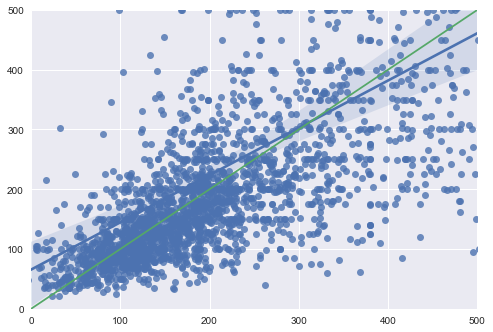

In [281]:
sns.regplot(y_pred, y_test)
plt.plot(range(0,10000), range(0,10000))
plt.xlim((0,500))
plt.ylim((0,500));